<a href="https://colab.research.google.com/github/kowsika-0719/-PowerBI-E-Commerce-Report/blob/main/Amazon_Food_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('/content/drive/MyDrive/data/Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()
df.Summary.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [ ]:
df.loc[1]['Text']

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text']=df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace(r'[^\w\s]','')
print(df['Text'].head(5))

<ipython-input-9-f8e3de31def8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text']=df['Text'].str.replace(r'[^\w\s]','')


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'].head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['Text'].head(5)


[nltk_data] Downloading package wordnet to /root/nltk_data...


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [ ]:
reviews=df
reviews.dropna(inplace=True)

In [ ]:
df.shape

(568411, 10)

In [ ]:
reviews.shape

(568411, 10)

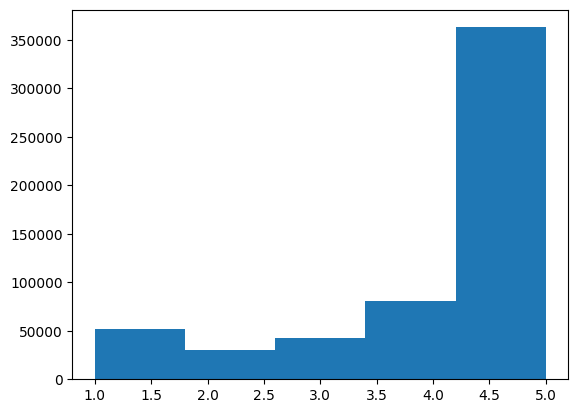

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [ ]:
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [ ]:
score_1=reviews[reviews['Score']==1].sample(n=29743)
score_2=reviews[reviews['Score']==2].sample(n=29743)
score_3=reviews[reviews['Score']==3].sample(n=29743)
score_4=reviews[reviews['Score']==4].sample(n=29743)
score_5=reviews[reviews['Score']==5].sample(n=29743)


In [ ]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [ ]:
reviews_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,208835,B000E8Y5D6,AZARTTC0YBP77,Jeremy Genovese,0,0,1,1345248000,nylon non-recyclable tea bag - health and envi...,purchased tea discovered tea bag made paper wr...
1,387225,B001VIYCK4,A15ASTBZBU7AXD,"KD Allen ""me""",5,6,1,1309046400,"Science Diet = terrible for cats, it's addictive",kittennow hefty 11 pound slugwent antic 1star ...
2,77844,B001LG940E,A1X9OJN30EBE3M,Dr. Karl O. Edwards,2,3,1,1237420800,"At 135 Calories Per 8 Ounces, This Was Not Wha...",update april 3 2009br ordered drink vine progr...
3,64662,B000I66258,A3R3QAE6OHV03F,curmudgeon,0,1,1,1202860800,Someone is crazy,review like fresh purchased product royal anne...
4,95911,B005FUMNQO,A3P1I747HDXFM9,Richard Bachman,1,3,1,1329004800,One Of The Worst Food Items I've Ever Eaten,saw many flavor available thought sea salt bla...


In [ ]:
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


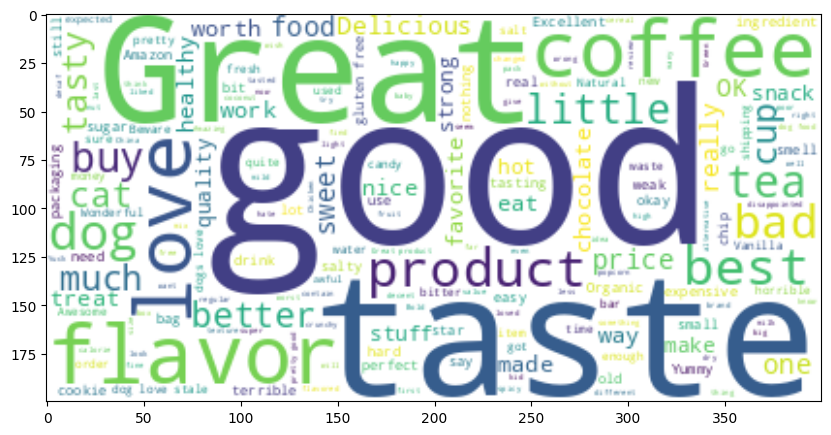

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
reviews_str=reviews_sample.Summary.str.cat()
wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()


In [ ]:
reviews_sample[reviews_sample['Score']==1]['Summary'].loc[0]

'nylon non-recyclable tea bag - health and environmental issues'

In [ ]:
negative=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive=reviews_sample[reviews_sample['Score'].isin([4,5])]
negative_str=negative.Summary.str.cat()
positive_str=positive.Summary.str.cat()

In [ ]:
wordcloud_negative=WordCloud(background_color='white').generate(negative_str)
wordcloud_positive=WordCloud(background_color='white').generate(positive_str)

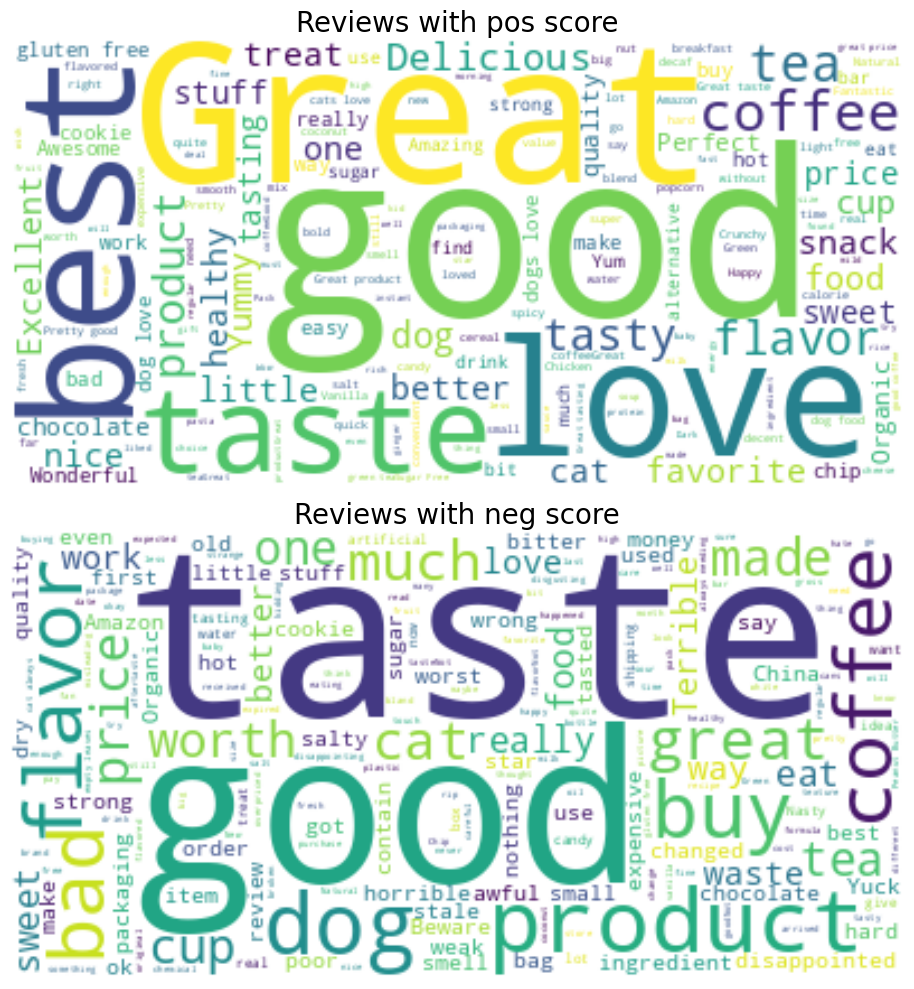

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

# Create the first subplot (ax1)
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.set_title('Reviews with pos score', fontsize=20)
ax1.axis('off')

# Create the second subplot (ax2)
ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.set_title('Reviews with neg score', fontsize=20)
ax2.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!pip install vaderSentiment

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

import seaborn as sns

import os

import sys

import ast

plt.style.use('fivethirtyeight')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
cp=sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd

analyzer =SentimentIntensityAnalyzer()

emptyline=[]
for row in tqdm(df ['Text'], total=len (df), desc='Analyzing Sentiments'):
  vs = analyzer.polarity_scores(row)
  emptyline.append(vs)



df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

Analyzing Sentiments: 100%|██████████| 568411/568411 [06:28<00:00, 1461.78it/s]


,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [ ]:
np.where(df_sentiments['compound']>=0,'Positive','Negative')

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [ ]:
df_sentiments['Sentiment']=np.where(df_sentiments['compound']>=0,'Positive','Negative')
df_sentiments.head(5)

,neg,neu,pos,compound,Sentiment
0,0.000,0.503,0.497,0.9413,Positive
1,0.129,0.762,0.110,-0.1027,Negative
2,0.130,0.587,0.283,0.8532,Positive
3,0.000,0.854,0.146,0.4404,Positive
4,0.000,0.369,0.631,0.9468,Positive


In [ ]:
df_sentiments['Sentiment'].value_counts()

Positive    524059
Negative     44352
Name: Sentiment, dtype: int64

<Axes: >

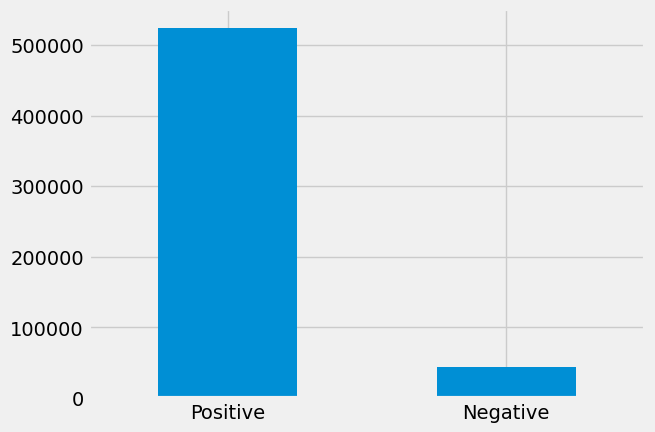

In [ ]:
result=df_sentiments['Sentiment'].value_counts()
result.plot(kind='bar',rot=0)